In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los 5 archivos
items     = pd.read_excel("olist_order_items_dataset.xlsx")
products  = pd.read_excel("olist_products_dataset.xlsx")
orders    = pd.read_excel("olist_orders_dataset.xlsx")
payments  = pd.read_excel("olist_order_payments_dataset.xlsx")
customers = pd.read_excel("olist_customers_dataset.xlsx")

print("✅ Datos cargados correctamente")
print(f"📦 Pedidos: {len(orders):,}")
print(f"🛍️ Items: {len(items):,}")
print(f"👥 Clientes: {len(customers):,}")

✅ Datos cargados correctamente
📦 Pedidos: 99,441
🛍️ Items: 112,650
👥 Clientes: 1,048,575


/tmp/ipython-input-2969176728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.values, y=top_cat.index, palette="Blues_r")


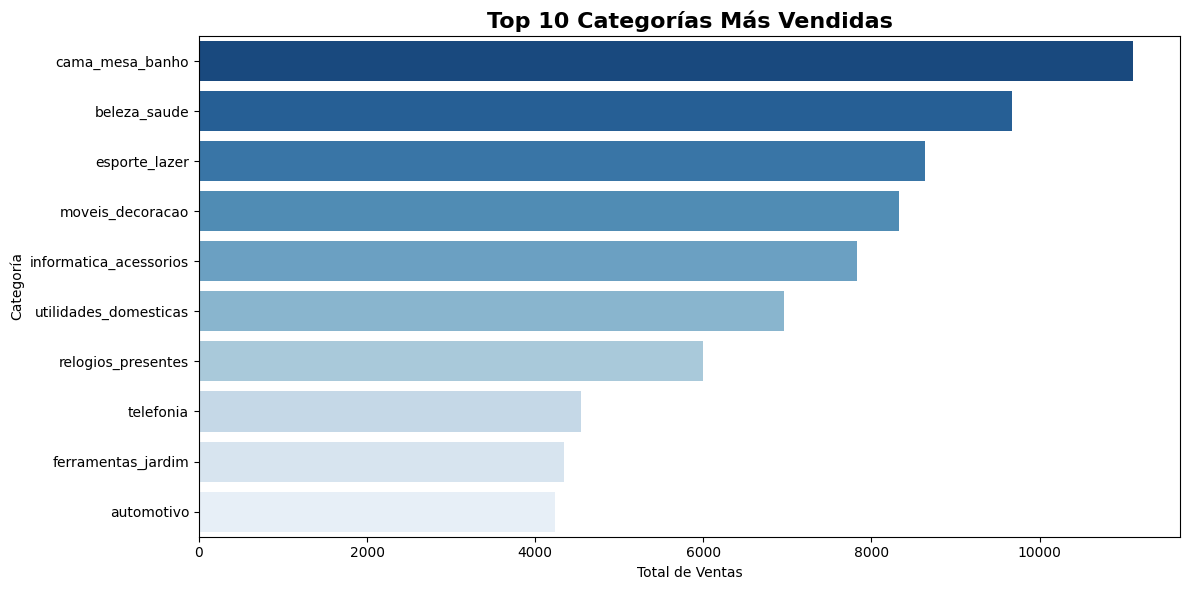

✅ Gráfico 1 guardado


In [2]:
# Unir items con productos
df_cat = items.merge(products, on="product_id")
top_cat = df_cat.groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cat.values, y=top_cat.index, palette="Blues_r")
plt.title("Top 10 Categorías Más Vendidas", fontsize=16, fontweight="bold")
plt.xlabel("Total de Ventas")
plt.ylabel("Categoría")
plt.tight_layout()
plt.savefig("grafico1_categorias.png", dpi=150)
plt.show()
print("✅ Gráfico 1 guardado")

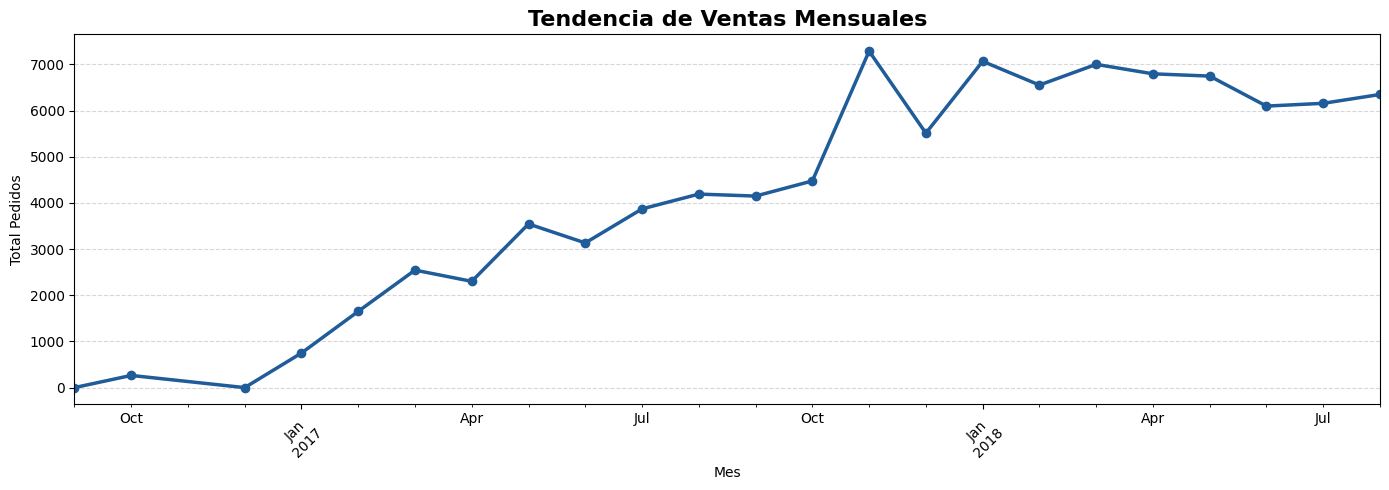

✅ Gráfico 2 guardado


In [3]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
ventas_mes = orders[orders["order_status"]=="delivered"].groupby(
    orders["order_purchase_timestamp"].dt.to_period("M"))["order_id"].count()

plt.figure(figsize=(14,5))
ventas_mes.plot(kind="line", marker="o", color="#1F5C99", linewidth=2.5)
plt.title("Tendencia de Ventas Mensuales", fontsize=16, fontweight="bold")
plt.xlabel("Mes")
plt.ylabel("Total Pedidos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("grafico2_tendencia.png", dpi=150)
plt.show()
print("✅ Gráfico 2 guardado")

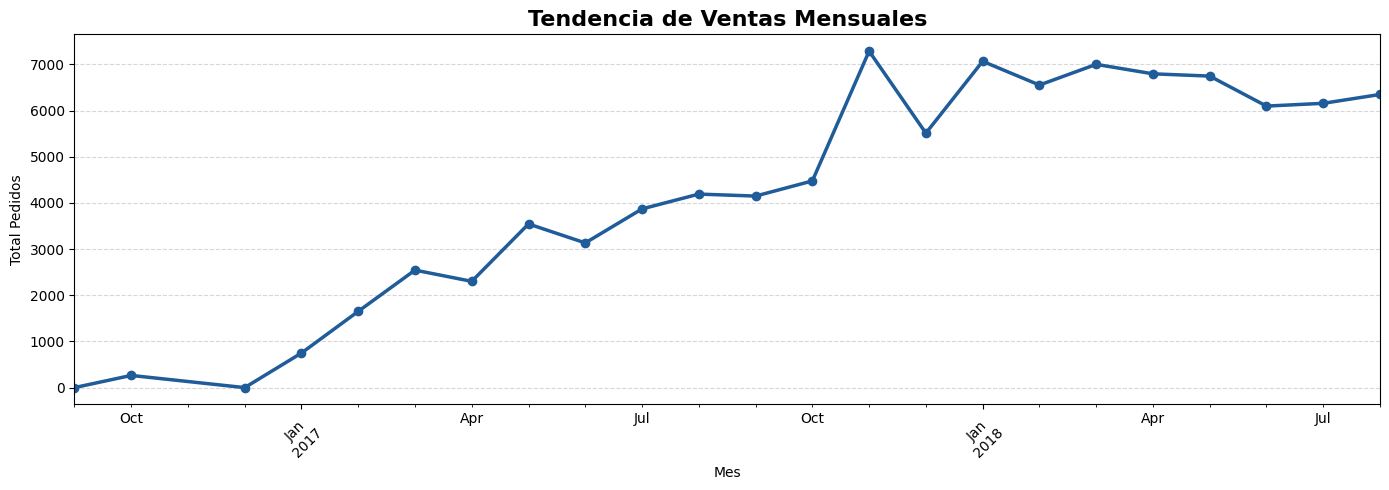

✅ Gráfico 2 guardado


In [4]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
ventas_mes = orders[orders["order_status"]=="delivered"].groupby(
    orders["order_purchase_timestamp"].dt.to_period("M"))["order_id"].count()

plt.figure(figsize=(14,5))
ventas_mes.plot(kind="line", marker="o", color="#1F5C99", linewidth=2.5)
plt.title("Tendencia de Ventas Mensuales", fontsize=16, fontweight="bold")
plt.xlabel("Mes")
plt.ylabel("Total Pedidos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("grafico2_tendencia.png", dpi=150)
plt.show()
print("✅ Gráfico 2 guardado")

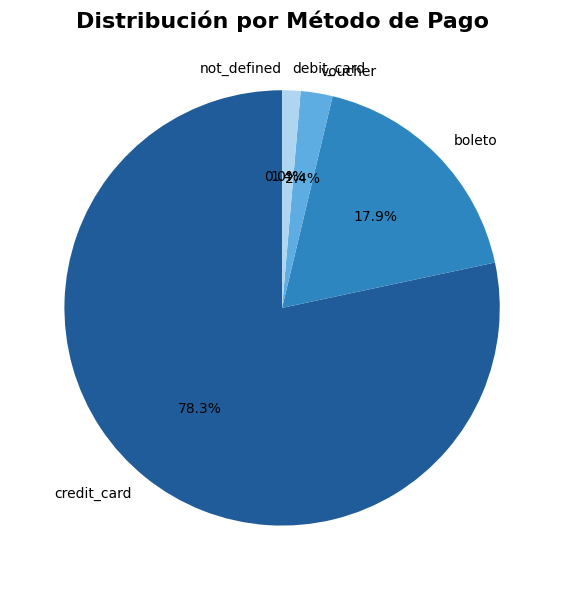

✅ Gráfico 3 guardado


In [5]:
pagos = payments.groupby("payment_type")["payment_value"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
colores = ["#1F5C99","#2E86C1","#5DADE2","#AED6F1"]
plt.pie(pagos.values, labels=pagos.index, autopct="%1.1f%%", colors=colores, startangle=90)
plt.title("Distribución por Método de Pago", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("grafico3_pagos.png", dpi=150)
plt.show()
print("✅ Gráfico 3 guardado")

In [6]:
from google.colab import files

files.download("grafico1_categorias.png")
files.download("grafico2_tendencia.png")
files.download("grafico3_pagos.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>